In [714]:
# importing the pandas library as pd
import pandas as pd

In [715]:
# importing the matplotlib.pyplot module as "plt"
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [716]:
# importing datetime module and timedelte
from datetime import datetime, timedelta

In [755]:
# importing numpy library as np
import numpy as np

In [718]:
def filter_df_by_column_name_and_date_range(df, column_name, begin_date, end_date):
    """
        filtering reservations based on specific column name and a date range.
        returning the filtered reservations.
    """
    # converting a column in a DataFrame to datetime format   
    df[column_name] = pd.to_datetime(df[column_name])
    # filtering df based on specific column name and a date range
    df = df[(df[column_name] >= begin_date) & (df[column_name] <= end_date)]
    return df

In [719]:
def get_confirmed_reservations(df):
    """
        excluding all canceled reservations from the filtered reservations.
        returning confirmed reservations.
    """
    # creating empty list
    canceled_reservation_ids = list()
    for index, row in df.iterrows():
        # finding all  canceled reservations with  RPG_STATUS 
        if row['RPG_STATUS'] == 2:
            if row['ROOM_RESERVATION_ID'] not in canceled_reservation_ids:
                # appending only canceled reservation's id                
                canceled_reservation_ids.append(row['ROOM_RESERVATION_ID'])
    #  excluding all canceled reservations from the filtered reservations.   
    confirmed_reservations = df[~df['ROOM_RESERVATION_ID'].isin(canceled_reservation_ids)]
    return confirmed_reservations

In [720]:
def get_total_rooms(df):
    """
        counting total rooms in the hotel.
        returning the number of total rooms.
    """
    total_rooms = df['ROOM_ID'].nunique()
    return total_rooms

In [721]:
def calculate_occupancy_rate(df, total_rooms):
    """
        calculating occupancy rate based on confirmed reservations.
        occupancy_rate = (number of occupied rooms / total rooms in the hotel) * 100.
        returning reservations series containing occupancy rate for dates.
    """
    #  grouping by NIGHT_OF_STAY and ROOM_ID columns
    grouped = df.groupby(['NIGHT_OF_STAY', 'ROOM_ID'])
    # second time group by NIGHT_OF_STAY column in order to count occupied rooms
    occupancy_rates = grouped.size().groupby('NIGHT_OF_STAY').size().reset_index(name='NUMBER_OF_OCCUPIED_ROOM')
    #  calculating occupancy rate.  
    occupancy_rates['OCCUPANCY_RATE'] = round(occupancy_rates['NUMBER_OF_OCCUPIED_ROOM'] / total_rooms * 100, 2)
    # sorting dataframe with NIGHT_OF_STAY
    occupancy_rates.sort_values('NIGHT_OF_STAY', inplace=True)
    return occupancy_rates

In [722]:
def merge_data(df, begin_date, end_date):
    """
        merging date ranges and reservations
    """
    # converting a column in a DataFrame to datetime format  
    df['NIGHT_OF_STAY'] = pd.to_datetime(df['NIGHT_OF_STAY'])
    # add new column called NIGHT_OF_STAY_str format like "04/07" which is taken from NIGHT_OF_STAY column
    df['NIGHT_OF_STAY_str'] = df['NIGHT_OF_STAY'].dt.strftime('%m/%d')
    # create date ranges (begin_date to end_date)
    date_range = pd.date_range(start=begin_date, end=end_date)
    # changing the format date     
    formatted_dates = date_range.strftime('%m/%d')
    # creating datafarme 'Dates' column    
    dates_df = pd.DataFrame({'Dates': formatted_dates})
    # merging two dataframe NIGHT_OF_STAY_str and Dates columns
    merged_df = pd.merge(df, dates_df, left_on='NIGHT_OF_STAY_str', right_on='Dates', how='left')
    # drop  NIGHT_OF_STAY_str column from the dataframe    
    merged_df.drop('NIGHT_OF_STAY_str', axis=1, inplace=True)
    merged_df['Dates'] = merged_df['Dates'].astype(str)
    return merged_df

In [723]:
def compare_dataframes_bar(this_year_reservations, last_year_reservations):
    """
        comparing this year OCCUPANCY_RATE and the last year OCCUPANCY_RATE in bar
    """
    # giving size 
    plt.figure(figsize=(10, 6))
    # concatenating or merging the dataframes
    combined_df = pd.concat([this_year_reservations, last_year_reservations], keys=['this year', 'the same day in last year'])
    # creating corresponding colors  
    colors = ['blue', 'red']
    # creating corresponding descriptions  
    descriptions = ['this year', 'the same day in last year']
    # plotting the bar graph
    plt.bar(combined_df['Dates'], combined_df['OCCUPANCY_RATE'], color=colors)
    
    # setting labels and title
    plt.xlabel('Date')
    plt.ylabel('Occupancy Rate')
    plt.title('Booking Curve - Occupancy Rate')
    legend_handles = []
    for i, name in enumerate(combined_df.index.get_level_values(0).unique()):
        handle = Patch(color=colors[i], label=name)
        legend_handles.append(handle)
    plt.legend(handles=legend_handles)
    # displaying the graph
    plt.show()
    

In [724]:
def plot_booking_curve(reservations, begin_date, end_date):
    """
        visualizing OCCUPANCY_RATE between begin_date and end_date in bar
    """
    # changing dates format like '/01/01/2022'    
    begin_format = begin_date.strftime('%m/%d/%Y')
    # changing dates format like '/01/01/2022' 
    end_format = end_date.strftime('%m/%d/%Y')
    # creating label for description     
    lable = f'{begin_format} to {end_format}'
    # giving size     
    plt.figure(figsize=(10, 6))
    # plotting the bar graph
    plt.bar(reservations['Dates'], reservations['OCCUPANCY_RATE'])
    # setting labels and title
    plt.xlabel('Date')
    plt.ylabel('Occupancy Rate')
    plt.title('Booking Curve - Occupancy Rate')
    
    # displaying the graph
    plt.legend()
    plt.show()

In [725]:
# reading reservation data from reservation_data_sample.csv
reservations = pd.read_csv('reservation_data_sample.csv')

In [726]:
# showing the first 5 rows of data
reservations.head()

,id,NIGHT_OF_STAY,ROOM_RESERVATION_ID,RPG_STATUS,ROOM_ID,DATE_LAST_MODIFIED,DATE_OF_RESERVATION,CANCELLATION_DATE,START_DATE_OF_STAY,END_DATE_OF_STAY,DAILY_RATE
0,3221,2020-03-05,69abfec0-f54a-432e-a94c-ab7500a35a3b,1,a8f2767b-651c-41c8-9876-ab5800c632c7,2020-03-05 00:00:00.000,2020-03-05,NaN,2020-03-05,2020-03-06,0.0
1,3222,2020-03-05,cdd6a453-0b40-4ae9-90e1-ab7500d52790,1,fe566287-5ebd-427d-9581-ab5800c632c7,2020-03-05 00:00:00.000,2020-03-05,NaN,2020-03-05,2020-03-06,0.0
2,3223,2020-03-05,44847440-7b0c-4c0b-a1d8-ab7500a66a6a,1,cdf4e734-ec50-429e-8f68-ab5800c632c7,2020-03-05 00:00:00.000,2020-03-05,NaN,2020-03-05,2020-03-06,0.0
3,3224,2020-03-05,4937e3c8-1a21-4990-8307-ab7500dcdd0e,1,1e56f140-04f9-4420-8116-ab5800c632c7,2020-03-05 00:00:00.000,2020-03-05,NaN,2020-03-05,2020-03-06,70.4
4,3225,2020-03-05,b7718820-838c-4953-ab86-ab7500afdd01,1,870b4928-d499-44ff-b3e2-ab5800c632c7,2020-03-05 00:00:00.000,2020-03-05,NaN,2020-03-05,2020-03-06,0.0


In [727]:
# copy the dataset
df = reservations.copy()

In [728]:
# working this year (assuming 2022 is current year)

In [729]:
# end_date for filtering
end_date = datetime.strptime('2022-07-16', '%Y-%m-%d')

In [730]:
# begin_date for filtering (100 days back from end_date)
begin_date = end_date - timedelta(days=100)

In [731]:
# filtering reservations based on DATE_OF_RESERVATION column name and between begin_date and end_date
filtered_data = filter_df_by_column_name_and_date_range(df, 'DATE_OF_RESERVATION', begin_date, end_date)

In [732]:
# showing the first 5 rows of data
filtered_data.head()

,id,NIGHT_OF_STAY,ROOM_RESERVATION_ID,RPG_STATUS,ROOM_ID,DATE_LAST_MODIFIED,DATE_OF_RESERVATION,CANCELLATION_DATE,START_DATE_OF_STAY,END_DATE_OF_STAY,DAILY_RATE
15990,16820,2022-06-30,4393e537-423f-4132-8192-ae7000b2ad22,1,ec864ca4-5652-4c76-a9b7-ab5800c632c7,2022-04-07 00:00:00.000,2022-04-07,NaN,2022-06-30,2022-07-04,142.94
15991,16855,2022-07-01,4393e537-423f-4132-8192-ae7000b2ad22,1,ec864ca4-5652-4c76-a9b7-ab5800c632c7,2022-04-07 00:00:00.000,2022-04-07,NaN,2022-06-30,2022-07-04,177.18
15992,16904,2022-07-02,4393e537-423f-4132-8192-ae7000b2ad22,1,ec864ca4-5652-4c76-a9b7-ab5800c632c7,2022-04-07 00:00:00.000,2022-04-07,NaN,2022-06-30,2022-07-04,178.38
15993,16953,2022-07-03,4393e537-423f-4132-8192-ae7000b2ad22,1,ec864ca4-5652-4c76-a9b7-ab5800c632c7,2022-04-07 00:00:00.000,2022-04-07,NaN,2022-06-30,2022-07-04,161.56
15994,19091,2022-04-08,388d0797-c0ee-46b4-bd7c-ae700167f274,1,1b6b81c1-6c78-474b-8f9f-ab5800c632c7,2022-04-07 00:00:00.000,2022-04-07,NaN,2022-04-08,2022-04-11,192.15


In [733]:
# excluding all canceled reservations from the filtered reservations
confirmed_reservations = get_confirmed_reservations(filtered_data)

In [734]:
# showing the first 5 rows of data
confirmed_reservations.head()

,id,NIGHT_OF_STAY,ROOM_RESERVATION_ID,RPG_STATUS,ROOM_ID,DATE_LAST_MODIFIED,DATE_OF_RESERVATION,CANCELLATION_DATE,START_DATE_OF_STAY,END_DATE_OF_STAY,DAILY_RATE
15990,16820,2022-06-30,4393e537-423f-4132-8192-ae7000b2ad22,1,ec864ca4-5652-4c76-a9b7-ab5800c632c7,2022-04-07 00:00:00.000,2022-04-07,NaN,2022-06-30,2022-07-04,142.94
15991,16855,2022-07-01,4393e537-423f-4132-8192-ae7000b2ad22,1,ec864ca4-5652-4c76-a9b7-ab5800c632c7,2022-04-07 00:00:00.000,2022-04-07,NaN,2022-06-30,2022-07-04,177.18
15992,16904,2022-07-02,4393e537-423f-4132-8192-ae7000b2ad22,1,ec864ca4-5652-4c76-a9b7-ab5800c632c7,2022-04-07 00:00:00.000,2022-04-07,NaN,2022-06-30,2022-07-04,178.38
15993,16953,2022-07-03,4393e537-423f-4132-8192-ae7000b2ad22,1,ec864ca4-5652-4c76-a9b7-ab5800c632c7,2022-04-07 00:00:00.000,2022-04-07,NaN,2022-06-30,2022-07-04,161.56
15994,19091,2022-04-08,388d0797-c0ee-46b4-bd7c-ae700167f274,1,1b6b81c1-6c78-474b-8f9f-ab5800c632c7,2022-04-07 00:00:00.000,2022-04-07,NaN,2022-04-08,2022-04-11,192.15


In [735]:
# geting the number of total rooms in the hotel
total_rooms = get_total_rooms(reservations)

In [736]:
total_rooms

47

In [737]:
# calculating occupancy rate
calculated_occupancy = calculate_occupancy_rate(filtered_data, total_rooms)

In [738]:
# showing the first 5 rows of data
calculated_occupancy.head()

,NIGHT_OF_STAY,NUMBER_OF_OCCUPIED_ROOM,OCCUPANCY_RATE
0,2022-04-07,1,2.13
1,2022-04-08,2,4.26
2,2022-04-09,2,4.26
3,2022-04-10,11,23.40
4,2022-04-11,13,27.66


In [739]:
# merging calculated_occupancy with range dates between begin_date and end_date
merged_reservations = merge_data(calculated_occupancy, begin_date, end_date)

In [740]:
# showing the first 5 rows of data
merged_reservations.head()

,NIGHT_OF_STAY,NUMBER_OF_OCCUPIED_ROOM,OCCUPANCY_RATE,Dates
0,2022-04-07,1,2.13,04/07
1,2022-04-08,2,4.26,04/08
2,2022-04-09,2,4.26,04/09
3,2022-04-10,11,23.40,04/10
4,2022-04-11,13,27.66,04/11


In [741]:
# working last year (from 2022-07-16)

In [742]:
# end_date for filtering
last_year_end_date = end_date - timedelta(days=364)

In [743]:
# begin_date for filtering
last_year_begin_date = last_year_end_date - timedelta(days=100)

In [744]:
# filtering reservations based on DATE_OF_RESERVATION column name and between last_year_begin_date and last_year_end_date
last_year_filtered_data = filter_df_by_column_name_and_date_range(df, 'DATE_OF_RESERVATION', last_year_begin_date, last_year_end_date)

In [745]:
# showing the first 5 rows of data
last_year_filtered_data.head()

,id,NIGHT_OF_STAY,ROOM_RESERVATION_ID,RPG_STATUS,ROOM_ID,DATE_LAST_MODIFIED,DATE_OF_RESERVATION,CANCELLATION_DATE,START_DATE_OF_STAY,END_DATE_OF_STAY,DAILY_RATE
4704,7487,2021-04-16,2ccf65fd-010c-40e0-8acf-ad0400ec8420,1,3c44527d-a64f-4b57-bf3b-ab5800c632c7,2021-04-08 00:00:00.000,2021-04-08,NaN,2021-04-16,2021-04-18,54.45
4705,7489,2021-04-17,2ccf65fd-010c-40e0-8acf-ad0400ec8420,1,3c44527d-a64f-4b57-bf3b-ab5800c632c7,2021-04-08 00:00:00.000,2021-04-08,NaN,2021-04-16,2021-04-18,54.45
4706,7491,2021-04-20,993874ec-818b-4495-8b14-ad0301789c44,1,e030cbd4-1cc1-43ba-b2a3-ab5800c632c7,2021-04-08 00:00:00.000,2021-04-08,NaN,2021-04-20,2021-04-21,54.45
4707,7479,2021-04-10,a37f7795-e993-47f7-bdf0-ad04016a93b6,1,e030cbd4-1cc1-43ba-b2a3-ab5800c632c7,2021-04-09 00:00:00.000,2021-04-09,NaN,2021-04-10,2021-04-11,76.23
4708,7553,2021-05-07,d5109285-a2ff-4338-978b-ad0500fea45b,1,e99be1f2-ce7d-4f04-805c-ab5800c632c7,2021-04-09 00:00:00.000,2021-04-09,NaN,2021-05-07,2021-05-08,113.60


In [746]:
# excluding all canceled reservations from the filtered reservations
last_confirmed_reservations = get_confirmed_reservations(last_year_filtered_data)

In [747]:
# showing the first 5 rows of data
last_confirmed_reservations.head()

,id,NIGHT_OF_STAY,ROOM_RESERVATION_ID,RPG_STATUS,ROOM_ID,DATE_LAST_MODIFIED,DATE_OF_RESERVATION,CANCELLATION_DATE,START_DATE_OF_STAY,END_DATE_OF_STAY,DAILY_RATE
4704,7487,2021-04-16,2ccf65fd-010c-40e0-8acf-ad0400ec8420,1,3c44527d-a64f-4b57-bf3b-ab5800c632c7,2021-04-08 00:00:00.000,2021-04-08,NaN,2021-04-16,2021-04-18,54.45
4705,7489,2021-04-17,2ccf65fd-010c-40e0-8acf-ad0400ec8420,1,3c44527d-a64f-4b57-bf3b-ab5800c632c7,2021-04-08 00:00:00.000,2021-04-08,NaN,2021-04-16,2021-04-18,54.45
4706,7491,2021-04-20,993874ec-818b-4495-8b14-ad0301789c44,1,e030cbd4-1cc1-43ba-b2a3-ab5800c632c7,2021-04-08 00:00:00.000,2021-04-08,NaN,2021-04-20,2021-04-21,54.45
4707,7479,2021-04-10,a37f7795-e993-47f7-bdf0-ad04016a93b6,1,e030cbd4-1cc1-43ba-b2a3-ab5800c632c7,2021-04-09 00:00:00.000,2021-04-09,NaN,2021-04-10,2021-04-11,76.23
4708,7553,2021-05-07,d5109285-a2ff-4338-978b-ad0500fea45b,1,e99be1f2-ce7d-4f04-805c-ab5800c632c7,2021-04-09 00:00:00.000,2021-04-09,NaN,2021-05-07,2021-05-08,113.60


In [748]:
# calculating occupancy rate
last_year_calculated_occupancy = calculate_occupancy_rate(last_year_filtered_data, total_rooms)

In [749]:
# showing the first 5 rows of data
last_year_calculated_occupancy.head()

,NIGHT_OF_STAY,NUMBER_OF_OCCUPIED_ROOM,OCCUPANCY_RATE
0,2021-04-10,1,2.13
1,2021-04-16,1,2.13
2,2021-04-17,1,2.13
3,2021-04-20,1,2.13
4,2021-04-24,1,2.13


In [750]:
# merging calculated_occupancy with range dates between begin_date and end_date
last_year_merged_reservations = merge_data(last_year_calculated_occupancy, begin_date, end_date)

In [751]:
# showing the first 5 rows of data
last_year_merged_reservations.head()

,NIGHT_OF_STAY,NUMBER_OF_OCCUPIED_ROOM,OCCUPANCY_RATE,Dates
0,2021-04-10,1,2.13,04/10
1,2021-04-16,1,2.13,04/16
2,2021-04-17,1,2.13,04/17
3,2021-04-20,1,2.13,04/20
4,2021-04-24,1,2.13,04/24


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


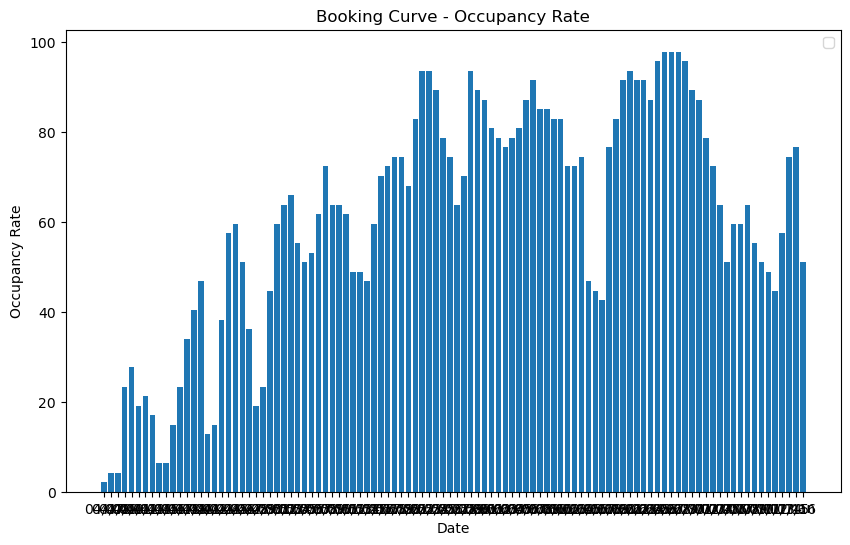

In [752]:
# visualizing this year OCCUPANCY_RATE in bar
plot_booking_curve(merged_reservations, begin_date, end_date)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


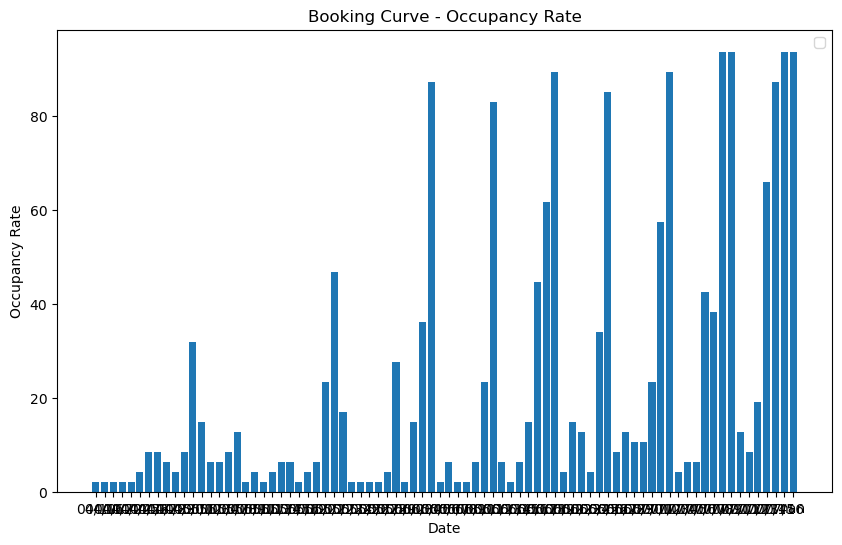

In [753]:
# visualizing this last OCCUPANCY_RATE in bar
plot_booking_curve(last_year_merged_reservations, last_year_begin_date, last_year_end_date)

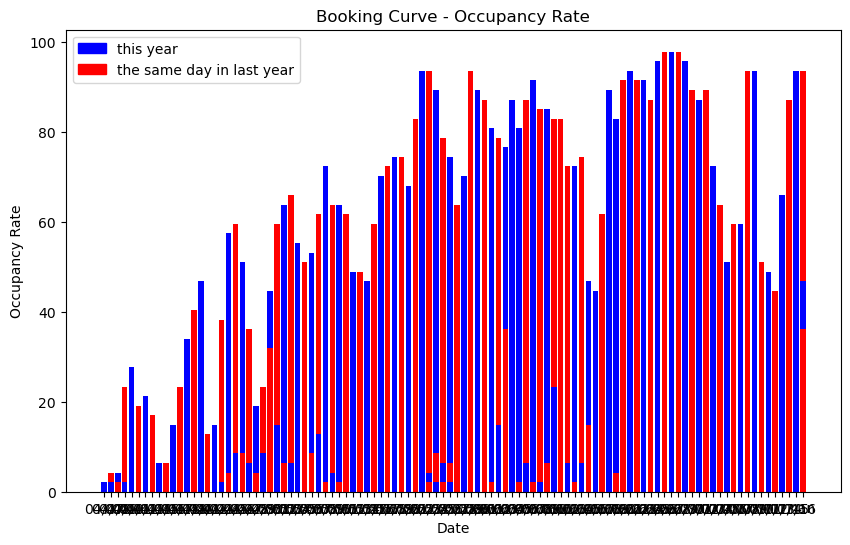

In [754]:
# comparing this year OCCUPANCY_RATE and the last year OCCUPANCY_RATE in bar
compare_dataframes_bar(merged_reservations, last_year_merged_reservations)